# An analysis of 3 scikit-learn Algorithms

Author: David Maguire

***

In [21]:
# For datasets
import numpy as np
import pandas as pd

# For Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn
import sklearn
import sklearn.model_selection as mod

# For K Nearest Neighbors
from sklearn.cluster import KMeans

# For Support Vector Regression
from sklearn import svm
from sklearn.svm import SVR

In [2]:
# Style for plots
plt.style.use('ggplot')

# Scikit-learn
Scikit-learn is a machien learning Python package. It contains numerous classification, clustering and regression algorithms and uses numpy and scipy libraries.

Scikit-learn was developed by [David Cournapeau in 2007.](https://scikit-learn.org/stable/about.html) It was later released to the public in 2010 and has been updated every 3 months since.

## Supervised vs Unsupervised Learning
Scikit learn algorithms fall into one of [2 categories:](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Supervised_Learning_Unsupervised_Learning.php). 

- **Supervised Learning** involves an algorithm learning from a training dataset. This is then normally applied to a testing dataset to find out the competency of the algorithm. Classification and regression are usually supervised learning
- **Unsupervised Learning** involves making a prediction from the data given and applying it to that same data set. Clustering is usually unsupervised learning

# Process for choosing algorithms

- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Algorithms

## Preparing Datasets

#### Penguins Dataset

https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [3]:
# read in dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Remove NaNs
pdf = penguins.dropna()
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


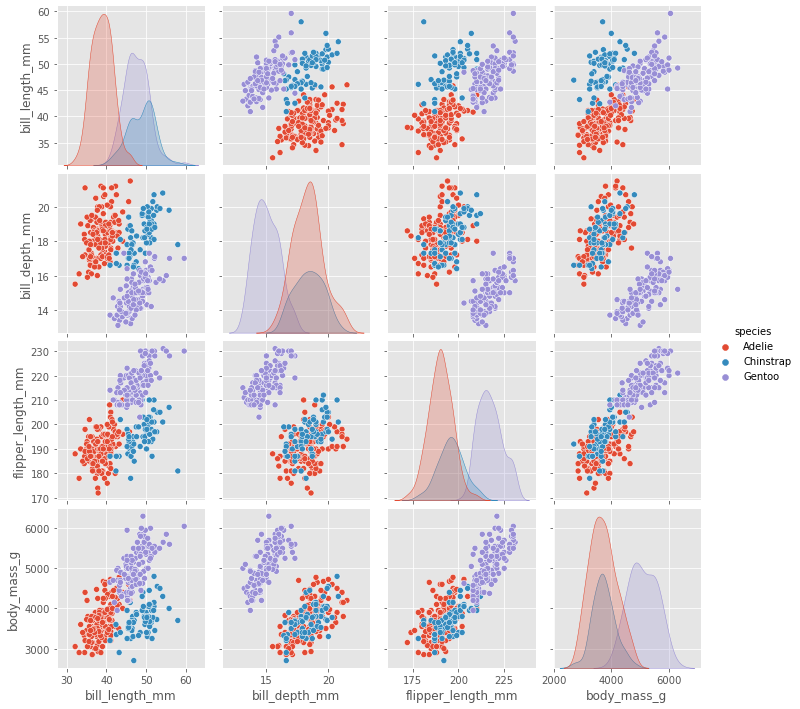

In [5]:
# Create dataset from some columns
pdfspecies = pdf[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

# Seaborn Pairplot
sns.pairplot(pdfspecies, hue = 'species');

In [6]:
# Create smaller dataset
billscluster = pdf[['bill_length_mm', 'bill_depth_mm', 'species']]
billscluster.head()

,bill_length_mm,bill_depth_mm,species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
4,36.7,19.3,Adelie
5,39.3,20.6,Adelie


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


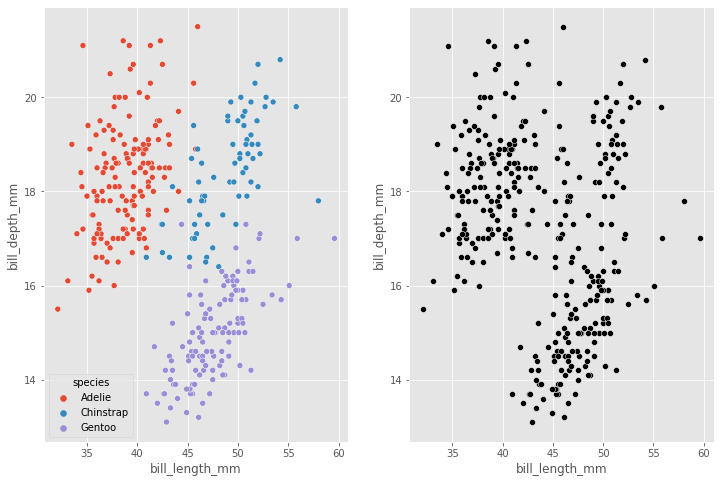

In [7]:
# Create figures and 2 plots
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,8))

# One plot comparing data points by species
sns.scatterplot(billscluster['bill_length_mm'], billscluster['bill_depth_mm'], hue = billscluster['species'], ax=ax1)

# Another without the species categorisation
sns.scatterplot(billscluster['bill_length_mm'], billscluster['bill_depth_mm'], ax=ax2, color='black');

These 2 plots show the bill length and depth of the penguins by species and on their own. We will later attempt to cluster these data points and compare.

# K-means Clustering

https://scikit-learn.org/stable/modules/clustering.html#k-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

K-means Clustering works by a process of:
 - Selecting K data points (either randomly or using [k-means++ [X]](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)) as centroids of clusters
 - Assigning each data point to its nearest centroid
 - Once all data points have been assigned, the mean of each cluster is the new centroid
 - Process repeats until no datapoints have been assigned to new clusters
 - Process is given a performance rating known as 'inertia' (based on total distance of data points to clusters)

This process will repeat itself a set number of times and the clustering process with the lowest inertia is chosen.

In [8]:
# Create a dataframe of bill lenth and depth
df = billscluster[['bill_length_mm','bill_depth_mm']].to_numpy()
df[:10]

array([[39.1, 18.7],
       [39.5, 17.4],
       [40.3, 18. ],
       [36.7, 19.3],
       [39.3, 20.6],
       [38.9, 17.8],
       [39.2, 19.6],
       [41.1, 17.6],
       [38.6, 21.2],
       [34.6, 21.1]])

In [9]:
# perform kmeans clustering with 3 clusters, 10 iterations of each run and 300 max iterations per run
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=0).fit(df)

In [10]:
# Total distance of all datapoints to its cluster
kmeans.inertia_

2265.0665966386564

In [11]:
# Location of centroids in run with lowest inertia
centroids = kmeans.cluster_centers_
centroids

array([[50.90352941, 17.33647059],
       [45.50982143, 15.68303571],
       [38.42426471, 18.27794118]])

In [12]:
# Create dataframe for centroids to show on plot
cdf = pd.DataFrame(centroids, columns=["x", "y"])
cdf

,x,y
0,50.903529,17.336471
1,45.509821,15.683036
2,38.424265,18.277941


In [13]:
# Number of iteration in the run of lowest inertia when the means became the final centroids
kmeans.n_iter_

21

In [14]:
# Result of clustering
clustering = kmeans.labels_
clustering

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [15]:
# Add clustering result to dataframe
billscluster['clustering'] = clustering.tolist()
billscluster.head()

<ipython-input-15-92f694f27f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billscluster['clustering'] = clustering.tolist()


,bill_length_mm,bill_depth_mm,species,clustering
0,39.1,18.7,Adelie,2
1,39.5,17.4,Adelie,2
2,40.3,18.0,Adelie,2
4,36.7,19.3,Adelie,2
5,39.3,20.6,Adelie,2


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

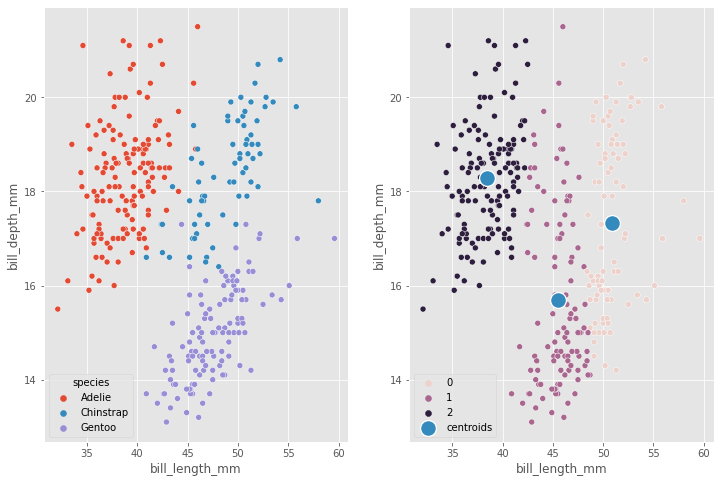

In [16]:
# Create figures and 2 plots
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,8))

# One plot comparing data points by species
sns.scatterplot(data = billscluster, x='bill_length_mm', y= 'bill_depth_mm', hue = 'species', ax=ax1)

# Another comparing by clustering
sns.scatterplot(data = billscluster, x= 'bill_length_mm', y= 'bill_depth_mm', hue = 'clustering', ax=ax2)

# Centorids of clustering on plot
sns.scatterplot(data=cdf, x = 'x', y = 'y',s = 250, ax = ax2, label = 'centroids')

#### Importance of Axis in visualising clustering
While it seems from the above plots that some datapoints are closer to centroids other than what they were assigned to, it is important to remember that the y axis range in the above plots are much smaller that that of the x axis. When having the same range for both axes, we get the below plots which visualise the correct clustering much better.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

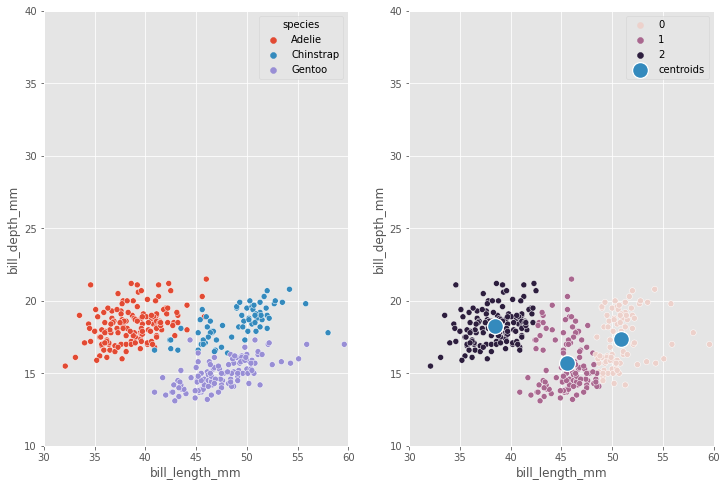

In [17]:
# Same as above plot, except y axis is set to be the same range as x axis
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,8))

# Range of 30
ax1.set(ylim=(10, 40))
ax2.set(ylim=(10, 40))

# Range of 30
ax1.set(xlim=(30, 60))
ax2.set(xlim=(30, 60))

sns.scatterplot(data = billscluster, x='bill_length_mm', y= 'bill_depth_mm', hue = 'species', ax=ax1)
sns.scatterplot(data = billscluster, x= 'bill_length_mm', y= 'bill_depth_mm', hue = 'clustering', ax=ax2)

sns.scatterplot(data=cdf, x = 'x', y = 'y',s = 250, ax = ax2, label = 'centroids')

While it is interesting to compare the results of the clustering with the real life differences in species, a difference in these plots does not necessarily mean a good or bad clustering method as clustering assumes no outliers like there would be with normal populations.

# Support Vector Regression

https://scikit-learn.org/stable/modules/svm.html#regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

Support Vector Regression  is similar to linear regression with the difference being that Support Vector Regression fits 2 lines or boundaries that cover all data points (some outliers can be exceptions) whereas linear regression picks the closest line to all datapoints. The regression line is then given to be the line in the middle of these 2 boundaries. Because only the outer datapoints are considered, SVR can be a very efficient regression algorithm.

![Image](https://i.stack.imgur.com/7bD2Z.jpg)

In the above example, 2 outliers can be seen outside of the boundaries.

In [18]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()

# Fit to given arrays
regr.fit(X, y)

# Predict from new array
regr.predict([[1, 1]])


array([1.5])

# KNeighbors Classification

https://scikit-learn.org/stable/modules/neighbors.html#classification

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 - Article on what K-Nearest Neighbors is in simple terms

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNeighbours Classification works by analysing a test dataset with inputs of numbered variables and an output of a categorical variable. It then places each unknown data point being classified and places it in the dataset of trained variables with known categories. A majority vote is taken from the nearest K (default is 5) data points. The data point is then cassified as whatever the majority category is.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
train, test = mod.train_test_split(pdfspecies)

In [23]:
# Classifying using all variables
inputs, outputs = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']], train['species']

In [24]:
# Fit to training data
neigh.fit(inputs, outputs)

KNeighborsClassifier()

In [25]:
# Test on testing Data
neigh.score(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']], test['species'])

0.7857142857142857

In [27]:
# Compare prediction with testing data
predictions = neigh.predict(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
(predictions == test['species']).value_counts()

True     66
False    18
Name: species, dtype: int64

***

# End